In [49]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Работа с временем в python

#### Datetime

In [52]:
from datetime import datetime

In [53]:
dt = datetime(year=2021, month=3, day=1, hour=18, minute=30)

In [54]:
dt

datetime.datetime(2021, 3, 1, 18, 30)

In [55]:
dt.year, dt.month, dt.second, dt.minute, dt.hour

(2021, 3, 0, 30, 18)

In [56]:
str(dt)

'2021-03-01 18:30:00'

In [9]:
# кастомный формат вывода

datetime.strftime(dt, '%d-%m-%Y %H:%M:%S')

'01-03-2021 18:30:00'

In [10]:
# получить datetime из строки
datetime.strptime('01-03-2021 18:30:00', '%d-%m-%Y %H:%M:%S')

datetime.datetime(2021, 3, 1, 18, 30)

#### Timestamp

Количество секунд прошедших с 1 января 1970 года 00:00:00

In [57]:
123401234

123401234

In [58]:
dt.timestamp()

1614612600.0

In [59]:
dt.fromtimestamp(1)

datetime.datetime(1970, 1, 1, 3, 0, 1)

In [60]:
dt.utcfromtimestamp(1)

datetime.datetime(1970, 1, 1, 0, 0, 1)

#### Timedelta

In [15]:
from datetime import timedelta

In [16]:
dt2 = datetime(year=2021, month=3, day=1, hour=21, minute=30)

In [17]:
delta = dt2 - dt

In [18]:
delta

datetime.timedelta(seconds=10800)

In [19]:
timedelta(minutes=15, hours=1, days=3)

datetime.timedelta(days=3, seconds=4500)

#### iso8601 - международный формат

In [20]:
# международный формат даты/времени iso8601
dt.isoformat()

'2021-03-01T18:30:00'

In [63]:
# международный формат duration
'P1D'
'PT1H'
'PT3M'
'P1DT1H3M'

'P1DT1H3M'

In [64]:
import isodate

isodate.parse_duration('P1DT1H3M')

datetime.timedelta(days=1, seconds=3780)

### Работа с временем в pandas

In [23]:
pd.to_datetime('2021')

Timestamp('2021-01-01 00:00:00')

In [24]:
pd.to_datetime('2021-01-01T12:01:01')

Timestamp('2021-01-01 12:01:01')

In [25]:
pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03'])

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq=None)

In [26]:
pd.date_range(start='2021-03-01T18:30', end='2021-03-01T21:30', freq='min')

DatetimeIndex(['2021-03-01 18:30:00', '2021-03-01 18:31:00',
               '2021-03-01 18:32:00', '2021-03-01 18:33:00',
               '2021-03-01 18:34:00', '2021-03-01 18:35:00',
               '2021-03-01 18:36:00', '2021-03-01 18:37:00',
               '2021-03-01 18:38:00', '2021-03-01 18:39:00',
               ...
               '2021-03-01 21:21:00', '2021-03-01 21:22:00',
               '2021-03-01 21:23:00', '2021-03-01 21:24:00',
               '2021-03-01 21:25:00', '2021-03-01 21:26:00',
               '2021-03-01 21:27:00', '2021-03-01 21:28:00',
               '2021-03-01 21:29:00', '2021-03-01 21:30:00'],
              dtype='datetime64[ns]', length=181, freq='T')

In [65]:
pd.date_range(freq='h', periods=4, start='2021-03-01T18:30')

DatetimeIndex(['2021-03-01 18:30:00', '2021-03-01 19:30:00',
               '2021-03-01 20:30:00', '2021-03-01 21:30:00'],
              dtype='datetime64[ns]', freq='H')

### Pandas Series
#### Для одномерных временных рядов в питоне лучше всего подходит структура класса pandas Series. Позволяет из коробки рисовать временные ряды, делать сложные слайсы. Будучи частью pandas, совместима со всем ML стеком питона.

In [66]:
ts = pd.Series(np.random.rand(100), pd.date_range(start='2019-11-26', periods=100))

<AxesSubplot:>

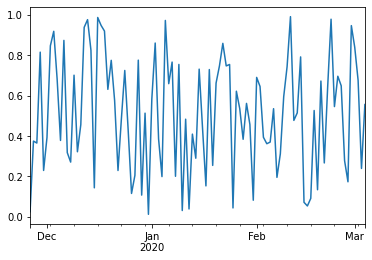

In [67]:
ts.plot()

<AxesSubplot:>

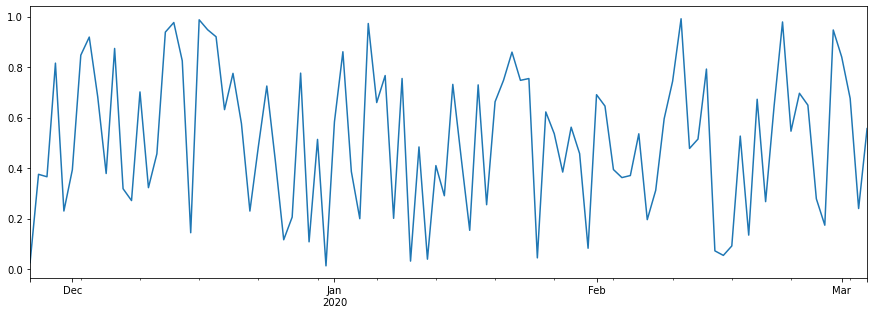

In [68]:
ts.plot(figsize=(15, 5))

In [69]:
# index select
ts[0]

0.0254860839545481

In [70]:
# datetime select
ts['2019-11-26']

0.0254860839545481

In [71]:
# index slice
ts[0:5]

2019-11-26    0.025486
2019-11-27    0.375327
2019-11-28    0.365639
2019-11-29    0.815892
2019-11-30    0.229930
Freq: D, dtype: float64

In [72]:
# datetime slice
ts['2019-11-26':'2019-11-29']

2019-11-26    0.025486
2019-11-27    0.375327
2019-11-28    0.365639
2019-11-29    0.815892
Freq: D, dtype: float64

In [73]:
# month, year slices

In [74]:
ts['2019-12']

2019-12-01    0.393328
2019-12-02    0.847434
2019-12-03    0.919134
2019-12-04    0.682757
2019-12-05    0.378542
2019-12-06    0.874113
2019-12-07    0.318214
2019-12-08    0.271300
2019-12-09    0.701794
2019-12-10    0.322453
2019-12-11    0.456698
2019-12-12    0.938824
2019-12-13    0.976843
2019-12-14    0.825212
2019-12-15    0.143821
2019-12-16    0.987587
2019-12-17    0.948284
2019-12-18    0.920394
2019-12-19    0.631653
2019-12-20    0.775408
2019-12-21    0.576458
2019-12-22    0.229712
2019-12-23    0.484980
2019-12-24    0.725198
2019-12-25    0.432004
2019-12-26    0.116015
2019-12-27    0.205757
2019-12-28    0.776309
2019-12-29    0.107807
2019-12-30    0.513706
2019-12-31    0.012633
Freq: D, dtype: float64

In [75]:
ts['2019']

2019-11-26    0.025486
2019-11-27    0.375327
2019-11-28    0.365639
2019-11-29    0.815892
2019-11-30    0.229930
2019-12-01    0.393328
2019-12-02    0.847434
2019-12-03    0.919134
2019-12-04    0.682757
2019-12-05    0.378542
2019-12-06    0.874113
2019-12-07    0.318214
2019-12-08    0.271300
2019-12-09    0.701794
2019-12-10    0.322453
2019-12-11    0.456698
2019-12-12    0.938824
2019-12-13    0.976843
2019-12-14    0.825212
2019-12-15    0.143821
2019-12-16    0.987587
2019-12-17    0.948284
2019-12-18    0.920394
2019-12-19    0.631653
2019-12-20    0.775408
2019-12-21    0.576458
2019-12-22    0.229712
2019-12-23    0.484980
2019-12-24    0.725198
2019-12-25    0.432004
2019-12-26    0.116015
2019-12-27    0.205757
2019-12-28    0.776309
2019-12-29    0.107807
2019-12-30    0.513706
2019-12-31    0.012633
Freq: D, dtype: float64

In [81]:
for attr in dir(ts):
    if not attr.startswith('_'):
        print(attr)

T
abs
add
add_prefix
add_suffix
agg
aggregate
align
all
any
append
apply
argmax
argmin
argsort
array
asfreq
asof
astype
at
at_time
attrs
autocorr
axes
backfill
between
between_time
bfill
bool
clip
combine
combine_first
compare
convert_dtypes
copy
corr
count
cov
cummax
cummin
cumprod
cumsum
describe
diff
div
divide
divmod
dot
drop
drop_duplicates
droplevel
dropna
dtype
dtypes
duplicated
empty
eq
equals
ewm
expanding
explode
factorize
ffill
fillna
filter
first
first_valid_index
flags
floordiv
ge
get
groupby
gt
hasnans
head
hist
iat
idxmax
idxmin
iloc
index
infer_objects
interpolate
is_monotonic
is_monotonic_decreasing
is_monotonic_increasing
is_unique
isin
isna
isnull
item
items
iteritems
keys
kurt
kurtosis
last
last_valid_index
le
loc
lt
mad
map
mask
max
mean
median
memory_usage
min
mod
mode
mul
multiply
name
nbytes
ndim
ne
nlargest
notna
notnull
nsmallest
nunique
pad
pct_change
pipe
plot
pop
pow
prod
product
quantile
radd
rank
ravel
rdiv
rdivmod
reindex
reindex_like
rename
rename_axis


In [39]:
# Из минусов - не самая быстрая структура данных

In [83]:
ts

2019-11-26    0.025486
2019-11-27    0.375327
2019-11-28    0.365639
2019-11-29    0.815892
2019-11-30    0.229930
                ...   
2020-02-29    0.947295
2020-03-01    0.840162
2020-03-02    0.676007
2020-03-03    0.239795
2020-03-04    0.556500
Freq: D, Length: 100, dtype: float64

In [86]:
ts.diff()

2019-11-26         NaN
2019-11-27    0.349841
2019-11-28   -0.009688
2019-11-29    0.450252
2019-11-30   -0.585962
                ...   
2020-02-29    0.773578
2020-03-01   -0.107133
2020-03-02   -0.164155
2020-03-03   -0.436212
2020-03-04    0.316705
Freq: D, Length: 100, dtype: float64

#### 2 хорошие библиотеки для визуализации временных рядов - bokeh и plotly. Делают анализ очень интерактивным.

In [91]:
from load_dataset import Dataset
import plotting

In [93]:
plotting.plot_ts(ts)

Loading BokehJS ...

In [94]:
plotting.plot_ts(ts, ts.shift(1))

Loading BokehJS ...